<a href="https://colab.research.google.com/github/Liping-LZ/BDAO_2223/blob/main/Text%20mining/Thesocialdilemma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
# once you run this code, it will prompt you to select a file. You just need to "Choose a file" (any file you want to do analysis) from your laptop. 

Saving thesocialdilemma.csv to thesocialdilemma.csv


In [ ]:
# once you upload the data to the cloud, you can read the data into dataframe. 
# Remember, if you close the notebook or disconnect, you need to upload the file (run the code above) again before you read data.

import pandas as pd
df = pd.read_csv('thesocialdilemma.csv').drop(['Unnamed: 0'],axis=1) # change the csv file name to your file name that you uploaded
df.head()

,user_id,tweet_date,tweet_id,like_count,quote_count,reply_count,retweet_count,source,tweet,user_name,user_created,user_description,followers_count,verified
0,5.886344e+08,2020-10-26 23:35:11+00:00,1.320870e+18,0,0,0,0,Twitter for iPhone,@jsanin You are the product #TheSocialDilemma,MariaC8510,2012-05-23T22:36:01.000Z,"I just want to feel as much as I can, it’s wha...",141,False
1,1.228423e+09,2020-10-26 23:17:40+00:00,1.320870e+18,0,0,0,0,Twitter for Android,Watching @netflix #TheSocialDilemma and my jaw...,ajdh719,2013-02-28T21:39:35.000Z,"I am a wife, a mother, school bus driver and a...",68,False
2,2.140827e+07,2020-10-26 23:10:05+00:00,1.320870e+18,1,0,0,0,Twitterrific for iOS,Worth a watch... The Social Dilemma. \n\n(Awar...,IrishGooner,2009-02-20T16:06:17.000Z,All things Arsenal (and other random musings) ...,607,False
3,4.001569e+08,2020-10-26 22:15:06+00:00,1.320850e+18,0,0,0,1,Twitter for iPad,#TheSocialDilemma is awesome! A MUST WATCH!,JKHallATL,2011-10-28T15:52:23.000Z,"Dad, Husband, Physician - Constantly Reading &...",2932,False
4,2.314838e+09,2020-10-26 21:34:51+00:00,1.320840e+18,2,0,0,0,Twitter for iPhone,I’m watching #TheSocialDilemma and it’s genuin...,hayology,2014-01-30T19:58:50.000Z,Using evidence for good. Head of Evidence and ...,1571,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23983 entries, 0 to 23982
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           23983 non-null  float64
 1   tweet_date        23983 non-null  object 
 2   tweet_id          23983 non-null  float64
 3   like_count        23983 non-null  int64  
 4   quote_count       23983 non-null  int64  
 5   reply_count       23983 non-null  int64  
 6   retweet_count     23983 non-null  int64  
 7   source            23983 non-null  object 
 8   tweet             23983 non-null  object 
 9   user_name         23983 non-null  object 
 10  user_created      23983 non-null  object 
 11  user_description  22356 non-null  object 
 12  followers_count   23983 non-null  int64  
 13  verified          23983 non-null  bool   
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 2.4+ MB


## **Do some basic processing of the data**

In [ ]:
# do some basic cleaning of the data
# when collecting data, replies are not excluded, so here we remove all the tweets starting with @ just suppose these are all replies.
# delete the lines with exact same tweet text, assuming they are duplicates
# after cleaning, the instance decrease from 23983 to 21051
df = df[~df['tweet'].str.startswith('@')]
df = df.drop_duplicates(subset=['tweet'])
len(df)

21051

In [ ]:
# some basic transformation of the data
# transform object to datetime format, tweet date & user_created date
df['user_created'] = pd.to_datetime(df['user_created'])
df['year_created'] = df['user_created'].dt.year
df['date'] = pd.to_datetime(df['tweet_date']).dt.date
df['hour'] = pd.to_datetime(df['tweet_date']).dt.hour

df['user_created'] = pd.to_datetime(df['user_created'])
df['year_created'] = df['user_created'].dt.year
data = df.drop_duplicates(subset='user_name', keep="first")

In [ ]:
# adding new column
# extract hashtags from the tweet text

import re
hashtag = []
for s in df['tweet']:
  hashtag.append(re.findall(r"#(\w+)", s)) 

df['hashtag'] = hashtag

In [ ]:
df.head()

,user_id,tweet_date,tweet_id,like_count,quote_count,reply_count,retweet_count,source,tweet,user_name,user_created,user_description,followers_count,verified,year_created,date,hour,hashtag
1,1.228423e+09,2020-10-26 23:17:40+00:00,1.320870e+18,0,0,0,0,Twitter for Android,Watching @netflix #TheSocialDilemma and my jaw...,ajdh719,2013-02-28 21:39:35+00:00,"I am a wife, a mother, school bus driver and a...",68,False,2013,2020-10-26,23,"[TheSocialDilemma, WakeUpNow, OpenYourEyes, tr..."
2,2.140827e+07,2020-10-26 23:10:05+00:00,1.320870e+18,1,0,0,0,Twitterrific for iOS,Worth a watch... The Social Dilemma. \n\n(Awar...,IrishGooner,2009-02-20 16:06:17+00:00,All things Arsenal (and other random musings) ...,607,False,2009,2020-10-26,23,"[Netflix, TheSocialDilemma]"
3,4.001569e+08,2020-10-26 22:15:06+00:00,1.320850e+18,0,0,0,1,Twitter for iPad,#TheSocialDilemma is awesome! A MUST WATCH!,JKHallATL,2011-10-28 15:52:23+00:00,"Dad, Husband, Physician - Constantly Reading &...",2932,False,2011,2020-10-26,22,[TheSocialDilemma]
4,2.314838e+09,2020-10-26 21:34:51+00:00,1.320840e+18,2,0,0,0,Twitter for iPhone,I’m watching #TheSocialDilemma and it’s genuin...,hayology,2014-01-30 19:58:50+00:00,Using evidence for good. Head of Evidence and ...,1571,False,2014,2020-10-26,21,[TheSocialDilemma]
5,2.543851e+07,2020-10-26 21:31:56+00:00,1.320840e+18,1,0,1,0,Twitter for iPhone,I have switched my default browser from @Googl...,marcus_sullivan,2009-03-20 02:17:55+00:00,opinions are my own.,682,False,2009,2020-10-26,21,[TheSocialDilemma]


## **Understand the trend after the film is released in Netflix**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

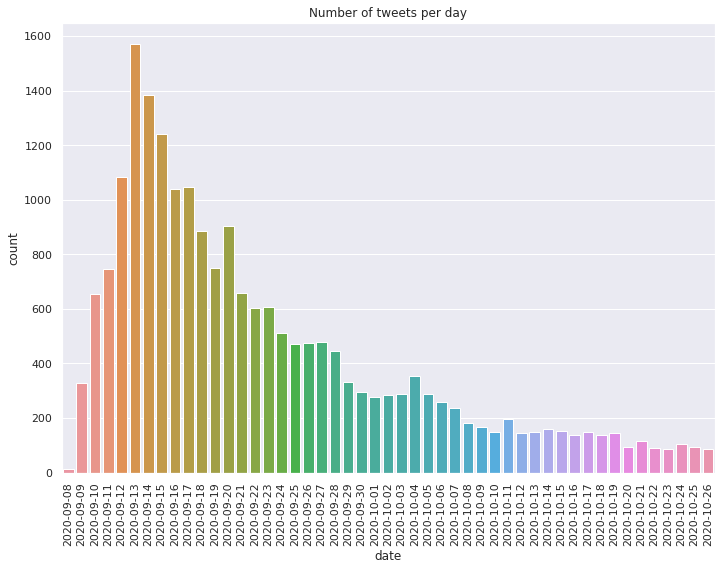

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

import matplotlib.pyplot as plt

# plot the distribution of tweets by date
chart = sns.countplot(x="date", data=df.sort_values(by=['date'])).set_title('Number of tweets per day')
plt.xticks(rotation=90)

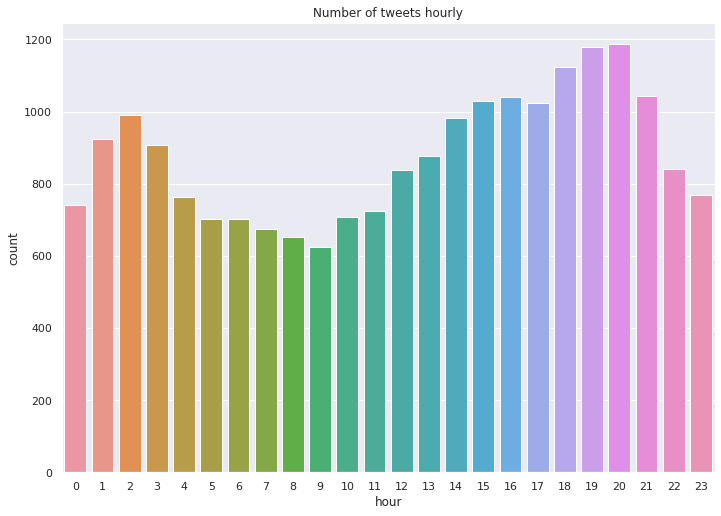

In [ ]:
# plot the distribution of tweets hourly
chart = sns.countplot(x="hour", data=df.sort_values(by=['hour'])).set_title('Number of tweets hourly')

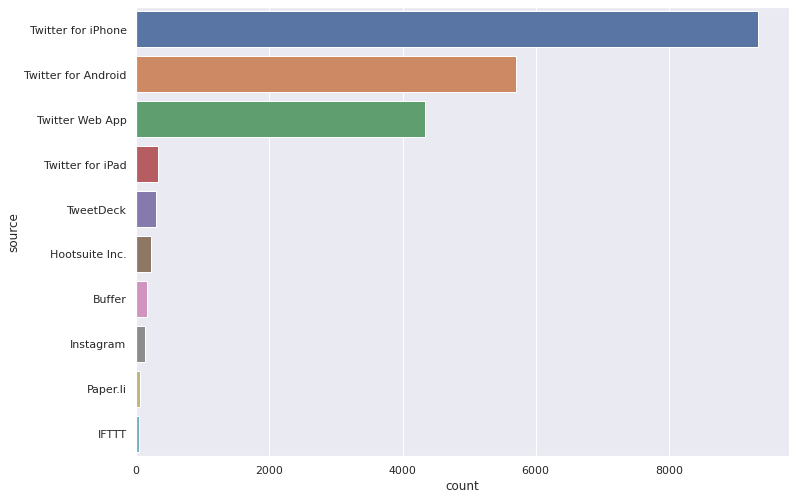

In [ ]:
# Plot the sources used by the users who post tweets about social dilemma
sns.countplot(y="source", data=df, order = df['source'].value_counts().index[0:10])

## **Understand who are posting in Twitter**

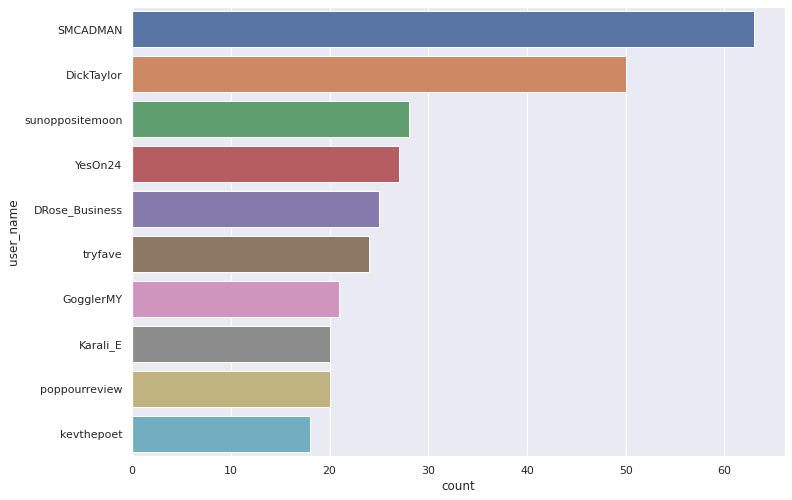

In [ ]:
sns.countplot(y="user_name", data=df, order = df['user_name'].value_counts().index[0:10])

In [ ]:
df[df['user_name'] =='SMCADMAN'][['tweet','user_description','followers_count','verified']]

,tweet,user_description,followers_count,verified
668,#Regulation #Regulate #TheSocialDilemma \nYOU ...,#Writer #Graphics #Dev 🇺🇦🇨🇦🇬🇧\nRevolutionary k...,6376,False
950,#Regulation #Regulate #TheSocialDilemma \n@NYD...,#Writer #Graphics #Dev 🇺🇦🇨🇦🇬🇧\nRevolutionary k...,6376,False
975,#Regulation #Regulate #TheSocialDilemma \n@NYD...,#Writer #Graphics #Dev 🇺🇦🇨🇦🇬🇧\nRevolutionary k...,6376,False
982,WE WILL MAKE YOU FREE! Welcome to Texas #DataC...,#Writer #Graphics #Dev 🇺🇦🇨🇦🇬🇧\nRevolutionary k...,6376,False
989,"""Texas"" just hitting now in trending. #Electio...",#Writer #Graphics #Dev 🇺🇦🇨🇦🇬🇧\nRevolutionary k...,6376,False
...,...,...,...,...
11109,"""Hundreds of journalists have been sifting thr...",#Writer #Graphics #Dev 🇺🇦🇨🇦🇬🇧\nRevolutionary k...,6376,False
11120,The Biggest Social Media Operation You’ve Neve...,#Writer #Graphics #Dev 🇺🇦🇨🇦🇬🇧\nRevolutionary k...,6376,False
14368,Suzerainty techbro mafia @Apple who shakedown ...,#Writer #Graphics #Dev 🇺🇦🇨🇦🇬🇧\nRevolutionary k...,6376,False
15211,"Also, you know, stop letting them become [a] ""...",#Writer #Graphics #Dev 🇺🇦🇨🇦🇬🇧\nRevolutionary k...,6376,False


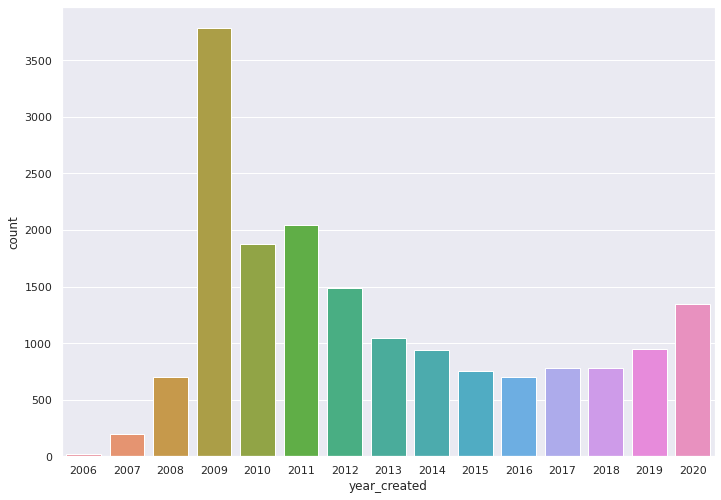

In [ ]:
# Plot the created_date of users who post tweets about social dilemma

sns.countplot(x="year_created", data=data)

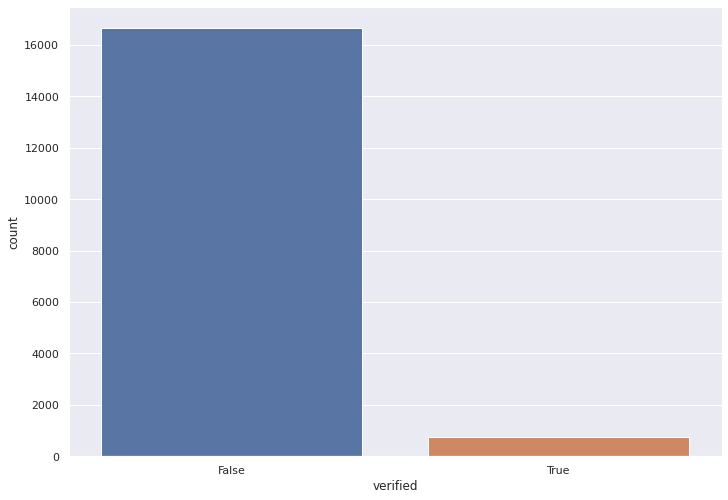

In [ ]:
# Plot the verfication_status of users who post tweets about social dilemma
sns.countplot(x="verified", data=data)

In [ ]:
df[df['verified']==True]['user_name'].unique().tolist()

['zubairabbasi',
 'RawTravelTV',
 'BridgieCasey',
 'NicoleBlades',
 'royal_suitor',
 'TC_Africa',
 'oliviaparsonstv',
 'CathyYoung63',
 'PenguinUKBooks',
 'diallo',
 'NityaGRajan',
 'PaulsMovieTrip',
 'tristanharris',
 'briansflood',
 'psychmag',
 'JaskiratSB',
 'BraveBisonIO',
 'michelewrightTV',
 'Great_Katzby',
 'PIX11News',
 'safiyanoble',
 'RickBakas',
 'CorriEnglish',
 'GingerGorman',
 'TheTechRabbi',
 'eSafetyOffice',
 'Blackamazon',
 'NewsCruz',
 'BarnardCollege',
 'LorenMcGinnis',
 'CurtisSChin',
 'WikiTribune',
 'BiIndia',
 'manabhardwaj',
 'kinseyschofield',
 'DaveYostOH',
 'rantsnbants',
 'TheTomGeorge',
 'GoggleboxAU',
 'HalleeAdelman',
 'ewanmcintosh',
 'robbwolf',
 'rdchahar1',
 'JOY949',
 'PremierRadio',
 'G_y_tri',
 'steveryancarter',
 'latasrinivasan',
 'Flinders',
 'CarolNdosi',
 'ChelseaSherrod',
 'FOXlightMichael',
 'AdamWiener',
 'BetteMidler',
 'allplants',
 'able2uk',
 'oppenheimera',
 'ProducerKyle',
 'utsarver',
 'scottbradlee',
 'MaiahOcando',
 'JustinKaufman

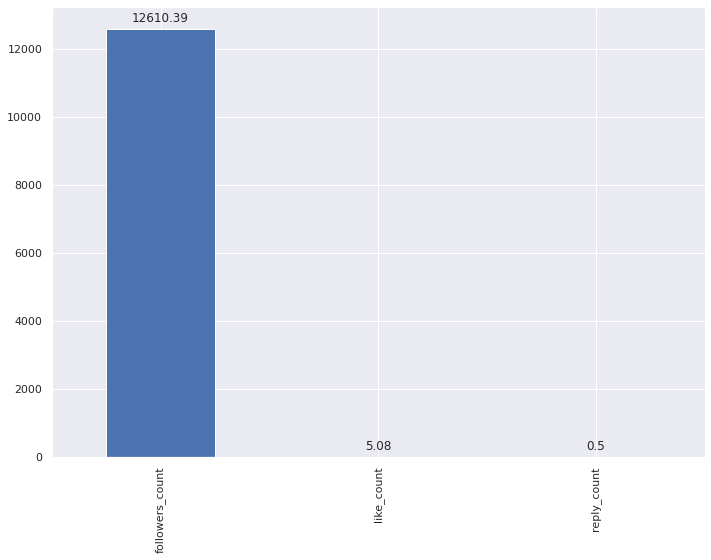

In [ ]:
import numpy as np
# Plot the number of follower, friends,favourites of users who post tweets about social dilemma
columns = ['followers_count','like_count','reply_count']
ax = data[columns].mean().plot.bar()
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')

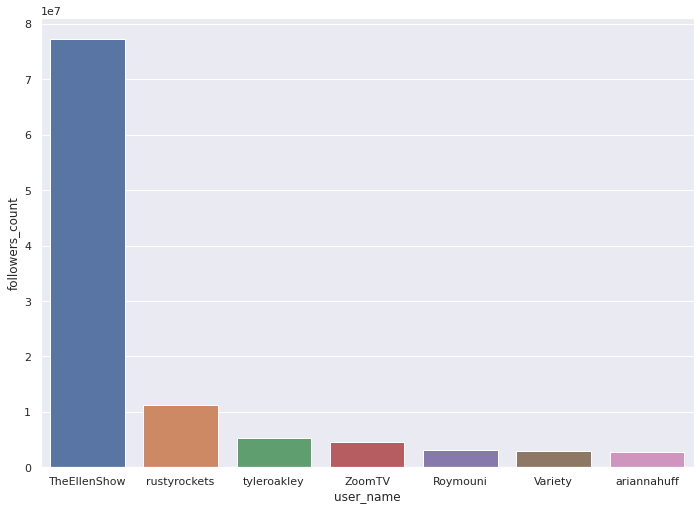

In [ ]:
# plot the users with the biggest number of followers
sns.barplot(x="user_name", y='followers_count',data=df.sort_values(by='followers_count',ascending=False).head(10))

In [ ]:
print(df.sort_values(by='like_count',ascending=False).head(5)[['user_name','tweet','like_count']])

             user_name  \
22055  tristanharris     
15500  caitrionambalfe   
2058   BetteMidler       
11819  vaishnavi         
23960  tristanharris     

                                                                                                                                                                                                                                                                                  tweet  \
22055  The problems illustrated in #TheSocialDilemma Netflix documentary are just the tip of the iceberg.\n\nDig deeper into these urgent issues on our @HumaneTech_ podcast "Your Undivided Attention" with me &amp; @aza:\n\nhttps://t.co/hx77tg9e05 https://t.co/QA6xjwUZhU            
15500  Everyone needs to watch @SocialDilemma_ documentary. It’s incredibly important and the irony that I’m tweeting about it is not lost on me. On #Netflix #TheSocialDilemma                                                                                                      

## **Understand how they feel after the film**

In [ ]:
import re
 
df['text'] = df['tweet'].map(lambda x: re.sub("@[A-Za-z0-9_]+","", x)) #remove mentions
df['text'] = df['text'].map(lambda x: re.sub("#[A-Za-z0-9_]+","", x)) #remove hashtags
df['text'] = df['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0]) #remove links

df['text'] = df['text'].map(lambda x: re.sub('\s+', ' ', x)) #remove /n
df['text'] = df['text'].map(lambda x: re.sub('\s{2,}', " ", x)) #remove overspace

In [ ]:
# first, import the package (suppose we haven't imported it yet) run the analyzer (SentimentIntensityAnalyzer())
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Then create new columns for your dataframe (compound, pos, neu, neg) with empty dictionary
# With for loop, we get the scores for each review and append the scores to the dictionary

Result = { 'compound':[], 'pos':[] , 'neu':[], 'neg':[] }

for tweet in df['text']:
    score = sid.polarity_scores(tweet)
    Result['pos'].append(score['pos'])
    Result['neu'].append(score['neu'])
    Result['neg'].append(score['neg'])
    Result['compound'].append(score['compound'])

# Once this is done, new columns are created and dictionary is transformed to the dataframe

df['compound'] = pd.DataFrame(Result)['compound']
df['pos'] = pd.DataFrame(Result)['pos']
df['neu'] = pd.DataFrame(Result)['neu']
df['neg'] = pd.DataFrame(Result)['neg']

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import numpy as np
df['sentiment_vader']=np.where(df['compound']>=0.05, 'Positive',np.where(df['compound']<=-0.05,'Negative', 'Neutral'))
df['sentiment_vader'].value_counts()

Neutral     7951
Positive    7551
Negative    5549
Name: sentiment_vader, dtype: int64

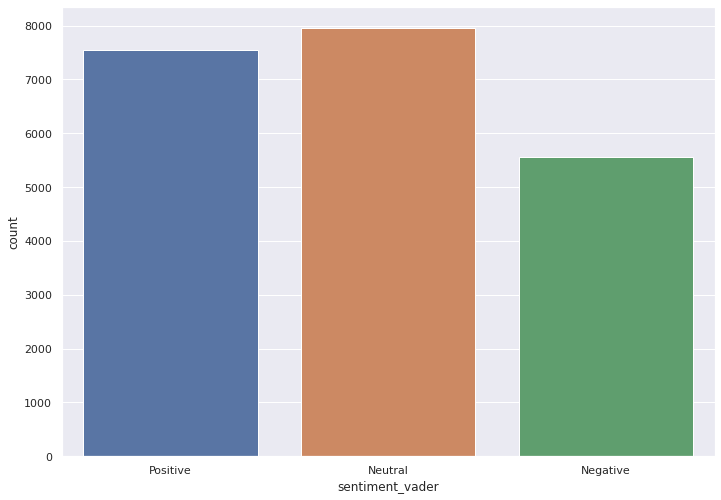

In [ ]:
sns.countplot(x='sentiment_vader',data = df,order=['Positive','Neutral','Negative'])

## **Understand what they are posting in Twitter**

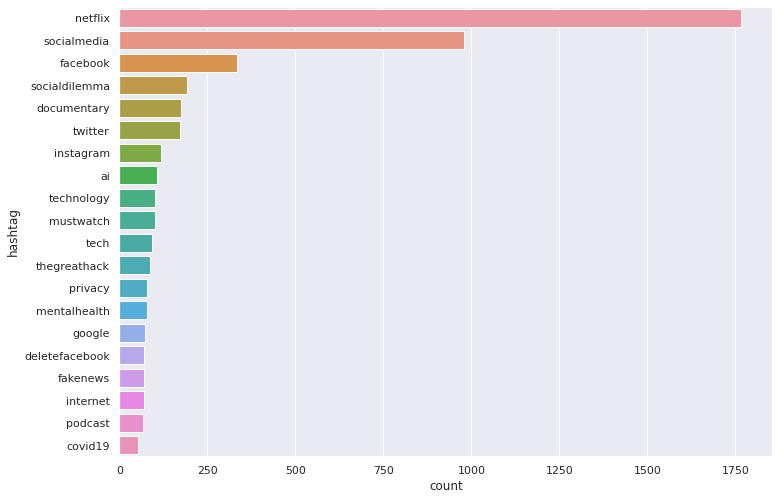

In [ ]:
# plot the top 10 hashtags in the tweets

def split_hashtags(x): 
    return str(x).replace('[', '').replace(']', '').split(',')

tweets_df = df[df['hashtag']!='[]']
tweets_df['hashtag'] = tweets_df['hashtag'].apply(lambda row : split_hashtags(row))
tweets_df = tweets_df.explode('hashtag')
tweets_df['hashtag'] = tweets_df['hashtag'].astype(str).str.lower().str.replace("'", '').str.replace(" ", '')

sns.countplot(y="hashtag", data=tweets_df, order = tweets_df['hashtag'].value_counts().index[1:21])

In [ ]:
df['text_filtered'] = df['text'].str.lower()
# Remove emoji
# First, build a list of commonly used emojis
emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

# Then remove the emoji
df['text_filtered'] = df['text_filtered'].map(lambda x: re.sub(emoj, ' ', x))

# Remove punctuation
import string
df['text_filtered'] = df['text_filtered'].map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

In [ ]:
# do tokenisation,lemmatisation and stopwords removal

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


# create a list of the reviews from the 'Reviews' column
words = df['text_filtered'].tolist()

# tokenise the words
from nltk.tokenize import word_tokenize

# create an empty list to put the tokenised words
word_tokens = [] 
for review in words:
    word_tokens.append(word_tokenize(review))


# remove stopwords
from nltk.corpus import stopwords
# use English stopwords
stopwords = stopwords.words("english")
# you can also extend the stopwords list with more words that you want to remove
stopwords.extend(['re'])

# create a new list with stop words removed
tokens_without_stopwords = []
for review in word_tokens:
    tokens_without_stopwords.append([w for w in review if not w in stopwords])


# lemmatise the words
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# The lemmatizer requires the correct POS tag to be accurate, if you use the default settings of the WordNetLemmatizer.lemmatize(), the default tag is noun.
# Which means the words other than noun would not be lemmatised, and this is not what we expect.
# Therefore we need to define the POS tags ('n' for nouns(default), 'a' for adj, 'v' for verb, 'r' for adverb) which are allowed to be lemmatised.

lemmatised = []
for review in tokens_without_stopwords: 
  n_lemmatised = [lemmatizer.lemmatize(w) for w in review]
  v_lemmatised = [lemmatizer.lemmatize(w,'v') for w in n_lemmatised]
  r_lemmatised = [lemmatizer.lemmatize(w,'r') for w in v_lemmatised]
  a_lemmatised = [lemmatizer.lemmatize(w,'a') for w in r_lemmatised]
  lemmatised.append(a_lemmatised) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# put the tokens back together as text to have our filtered reviews
rejoin = []
for review in lemmatised: # Here we choose to use stemming instead of lemmatisation
    x = " ".join(review) # join the text back together 
    rejoin.append(x)

# add the reformed text to the data frame    
df['text_filtered'] = rejoin

In [ ]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer().fit(corpus) # you can also change it to tfidfvectorizer, then you are looking for top words based on tf-idf
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top_10_words = get_top_n_words(df['text_filtered'], 10)
for word, freq in top_10_words:
    print(word, freq)

watch 10633
social 7314
medium 4843
netflix 2688
documentary 2354
dilemma 2125
think 2051
product 1693
know 1580
see 1576


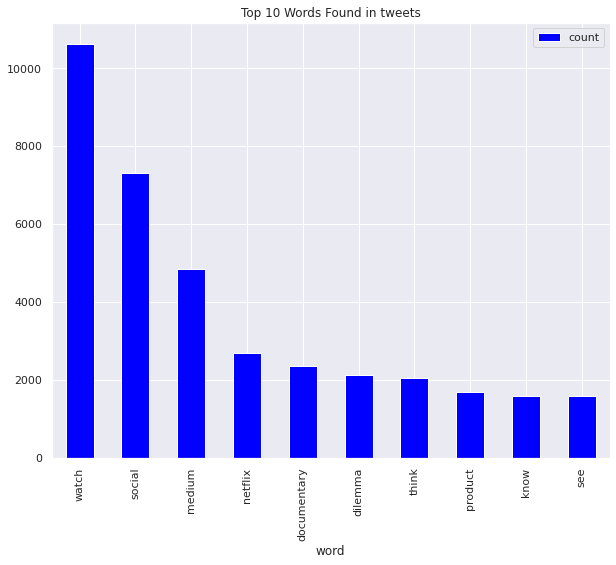

In [ ]:
import matplotlib.pyplot as plt
top10_df = pd.DataFrame(top_10_words, columns=['word', 'count'])

fig, ax = plt.subplots(figsize=(10, 8))
# Plot horizontal bar graph
top10_df.plot.bar(x='word',y='count',ax=ax,color="blue")

ax.set_title("Top 10 Words Found in tweets")

plt.show()

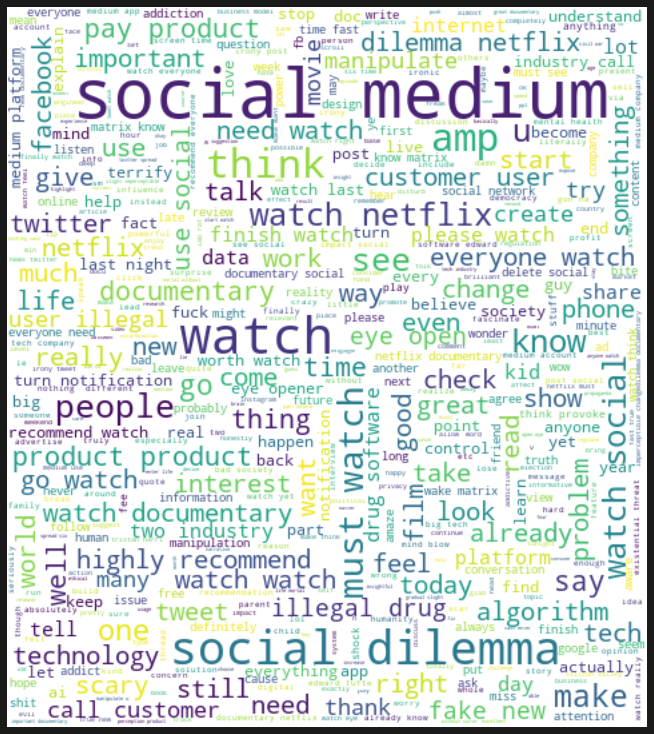

In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction import text

long_string = ' '.join(list(df['text_filtered']))
wordcloud = WordCloud(width = 480, height = 540, background_color= 'white', max_words=500, contour_width=3, contour_color= 'steelblue').generate(long_string)
plt.figure(figsize=(20,10),facecolor ='k')
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# vectorise the data into word counts

from sklearn.feature_extraction.text import CountVectorizer

max_words = 1000 #how many words taking account for topic modeling 
vectorizer = CountVectorizer(max_features=max_words)
vec = vectorizer.fit_transform(df['text_filtered'])

In [ ]:
# fit LDA

from sklearn.decomposition import LatentDirichletAllocation as LDA

k = 5 #this is the number of the topic. you can decide the number
lda = LDA(n_components=k, max_iter=5, learning_method='online')
lda.fit(vec)

LatentDirichletAllocation(learning_method='online', max_iter=5, n_components=5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


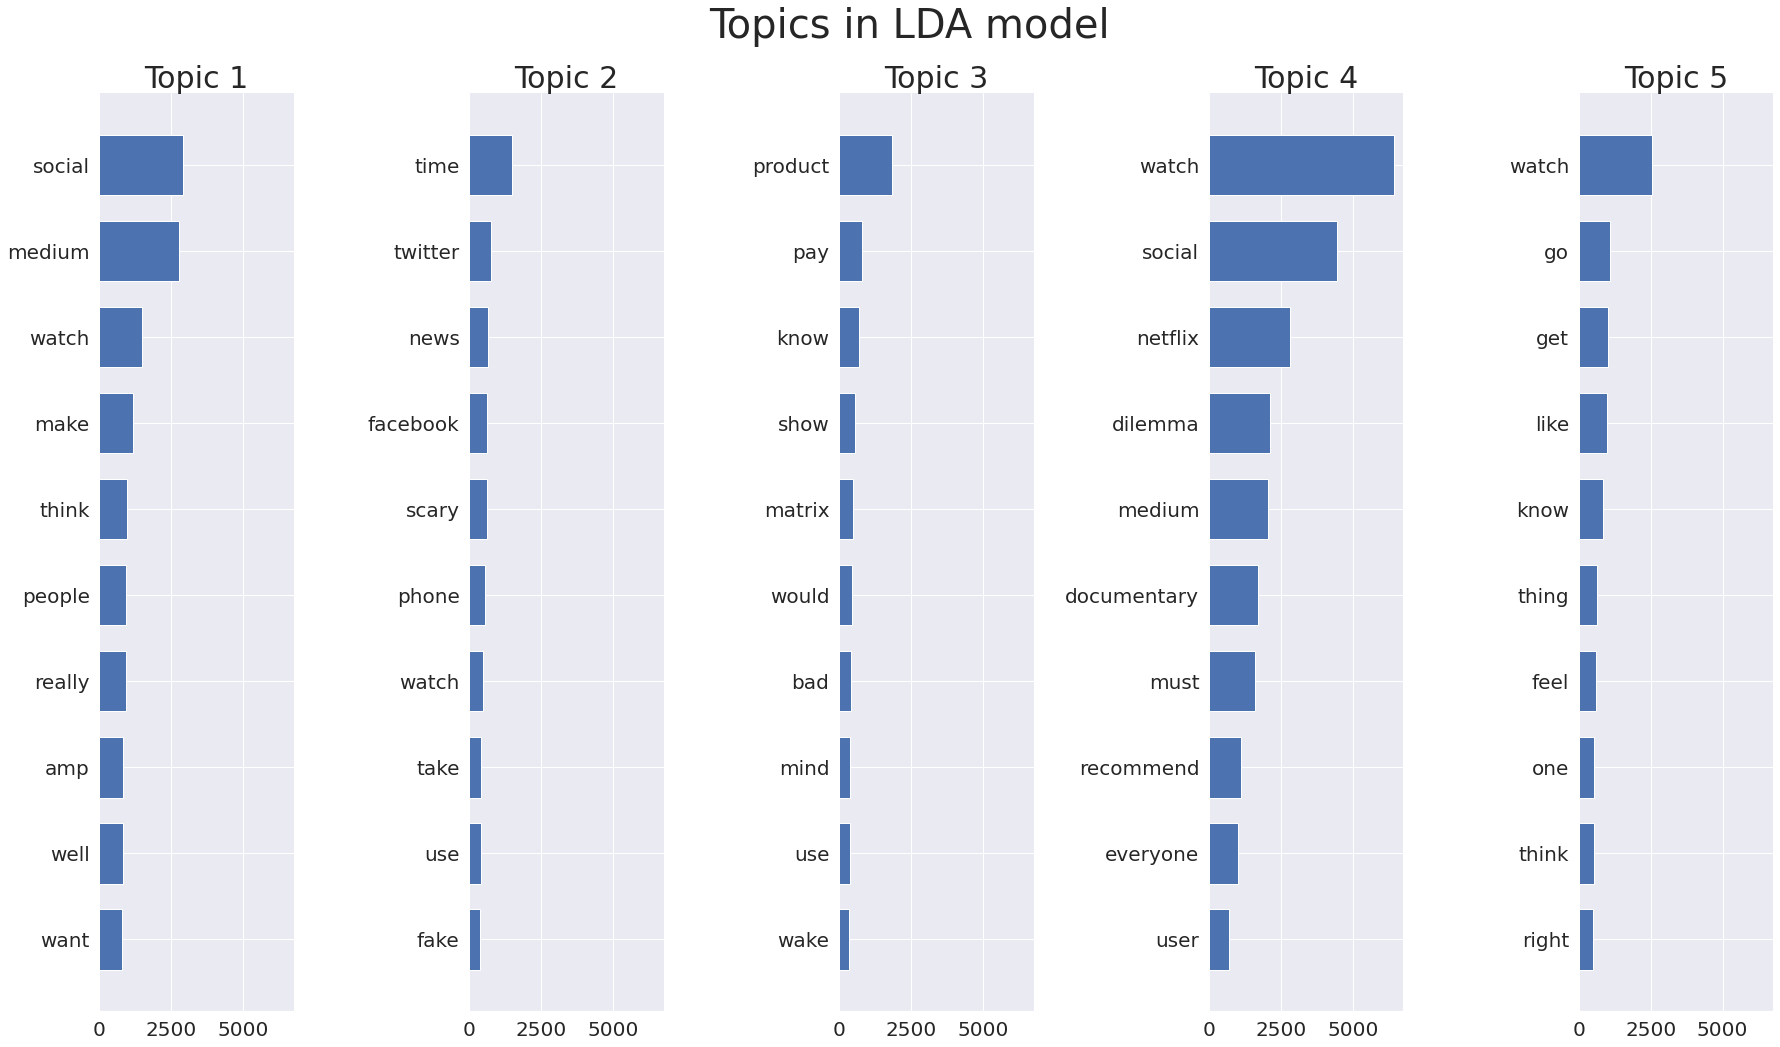

In [ ]:
# Visualise the result into topic clouds

%matplotlib inline
import matplotlib.pyplot as plt

# helper function to plot topics
# see Grisel et al. 
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 10  #how many words to be visualised in each topic

# get the list of words (feature names)
vec_feature_names = vectorizer.get_feature_names()

# print the top words per topic
plot_top_words(lda, vec_feature_names, n_top_words, 'Topics in LDA model')

In [ ]:
# visualise the result with pyLDAvis

!pip install pyLDAvis # install the package for the first time running

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

p = pyLDAvis.sklearn.prepare(lda, vec, vectorizer)
pyLDAvis.save_html(p, 'lda.html')
files.download('lda.html')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>